In [15]:
def get_digits(num):
    ret = []
    while(num):
        ret.append(num % 10)
        num = num // 10
    return ret

def get_sum(digits):
    res = 0
    for d in digits:
        res += d * d
    return res


def isHappy(n):
    num = n

    loop =[0] * 100
    i = 0; j = 1
    while(num != 1):
        ds = get_digits(num)
        num = get_sum(ds)
        loop[j] = num
        print(ds, num)
        if loop[j] == loop[i]:
            return False
        j += 1
        if j % 2== 0:
            i += 1
        
        
    return True
        
isHappy(1344659)

[9, 5, 6, 4, 4, 3, 1] 184
[4, 8, 1] 81
[1, 8] 65
[5, 6] 61
[1, 6] 37
[7, 3] 58
[8, 5] 89
[9, 8] 145
[5, 4, 1] 42
[2, 4] 20
[0, 2] 4
[4] 16
[6, 1] 37
[7, 3] 58
[8, 5] 89


False

In [17]:
'->'.join(['1','2','3'])

'1->2->3'

In [19]:
words = ["a", "banana", "app", "ba","ban","bana","appl", "ap", "apply","apple"]
sorted(words)

['a', 'ap', 'app', 'appl', 'apple', 'apply', 'ba', 'ban', 'bana', 'banana']

In [58]:
def longestWord(words):
    """
    :type words: List[str]
    :rtype: str
    """
    if not words: return ''
    words.sort()
    target = ''
    for w in words:
        if len(w) == 1:
            target = w
            break
    v = set()
    v.add(target)
    mcount = len(target)
    for w in words:
        print(w, w[:-1])
        print(v)
        if w[:-1] in v:
            wlen = len(w)
            v.add(w)
            if wlen > mcount: 
                target = w
                mcount = wlen
        elif len(w) == 1:
            v.add(w)
            
    return target

words = ["rac","rs","ra","on","r","otif","o","onpdu","rsf","rs","ot","oti","racy","onpd"]
words = ["m","mo","moc","moch","mocha","l","la","lat","latt","latte","c","ca","cat"]
words = ["yo","ew","fc","zrc","yodn","fcm","qm","qmo","fcmz","z","ewq","yod","ewqz","y"]
longestWord(words)

ew e
{'y'}
ewq ew
{'y'}
ewqz ewq
{'y'}
fc f
{'y'}
fcm fc
{'y'}
fcmz fcm
{'y'}
qm q
{'y'}
qmo qm
{'y'}
y 
{'y'}
yo y
{'y'}
yod yo
{'yo', 'y'}
yodn yod
{'yo', 'yod', 'y'}
z 
{'yo', 'yod', 'y', 'yodn'}
zrc zr
{'yodn', 'y', 'yo', 'z', 'yod'}


'yodn'

In [71]:
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None
        
def createList(nums):
    if not nums: return ListNode(None)
    head = ListNode(nums[0])
    tail = head
    for n in nums[1:]:
        tmp = ListNode(n)
        tail.next = tmp
        tail = tmp
    return head

def mprint(head):
    ptr = head
    while ptr:
        print(ptr.val, end = ' ')
        ptr = ptr.next
    print('')
def mergeTwoLists(l1, l2):
    """
    :type l1: ListNode
    :type l2: ListNode
    :rtype: ListNode
    """
    N1 = N2 = 0
    p1, p2 = l1, l2
    while p1:
        N1 += 1
        p1 = p1.next
    while p2:
        N2 += 1
        p2 = p2.next
    #print(N1, N2)
    if N1 >= N2:
        p1, p2 = l1, l2
    else:
        p1, p2 = l2, l1

    head = ListNode(None)
    head.next = p1
    pre = head
    while p1 and p2:    
        #print(p1.val, p2.val)
        if p1.val > p2.val:
            pre2 = p2
            ptr2 = p2.next
            while ptr2 and ptr2.val <= p1.val:
                #print("ptr2=",ptr2.val)
                pre2 = ptr2
                ptr2 = ptr2.next
            pre.next = p2
            pre2.next = p1
            
            p2 = ptr2
            
        pre = p1
        p1 = p1.next
    
    if p2:
        pre.next = p2
            
    return head.next

n1 = [8,10,12,15,17,19,21,22,25]
n2=[2,3,4,5,6,7,8,9,11]
l1 = createList(n1)
l2 = createList(n2)
mprint(l1)
mprint(l2)
l3 = mergeTwoLists(l1,l2)
mprint(l3)

8 10 12 15 17 19 21 22 25 
2 3 4 5 6 7 8 9 11 
9 9
8 2
ptr2= 3
ptr2= 4
ptr2= 5
ptr2= 6
ptr2= 7
ptr2= 8
10 9
12 11
2 3 4 5 6 7 8 8 9 10 11 12 15 17 19 21 22 25 


In [74]:
def findLHS(nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    if not nums: return 0
    nums.sort()
    mcount = count = 1

    last = nums[0]
    v = dict()
    v[last] = 1
    for i in range(1, len(nums)):
        n = nums[i]
        v[n] = v.get(n, 0) + 1
        print(n, v)
        if n == last or n-1 == last:
            count += 1
            print("count ++ ",count)
        else:
            mcount = max(mcount, count)
            count -= v[last]
            last = nums[i-1]
            if n == last or n-1 == last:
                count += 1
            print("new count = ",count)
    mcount = max(mcount, count)
    return mcount
nums = [1,3,2,2,5,2,3,7,6,6,6,6,6,7]
findLHS(nums)

2 {1: 1, 2: 1}
count ++  2
2 {1: 1, 2: 2}
count ++  3
2 {1: 1, 2: 3}
count ++  4
3 {1: 1, 2: 3, 3: 1}
new count =  4
3 {1: 1, 2: 3, 3: 2}
count ++  5
5 {1: 1, 2: 3, 3: 2, 5: 1}
new count =  2
6 {1: 1, 2: 3, 3: 2, 5: 1, 6: 1}
new count =  1
6 {1: 1, 2: 3, 3: 2, 5: 1, 6: 2}
count ++  2
6 {1: 1, 2: 3, 3: 2, 5: 1, 6: 3}
count ++  3
6 {1: 1, 2: 3, 3: 2, 5: 1, 6: 4}
count ++  4
6 {1: 1, 2: 3, 3: 2, 5: 1, 6: 5}
count ++  5
7 {1: 1, 2: 3, 3: 2, 5: 1, 6: 5, 7: 1}
new count =  5
7 {1: 1, 2: 3, 3: 2, 5: 1, 6: 5, 7: 2}
count ++  6


6

In [75]:
nums = [1,3,2,2,5,2,3,7,6,6,6,6,6,7]
v = dict()
for n in nums:
    v[n] = v.get(n,0) + 1
list(v.keys())

[1, 3, 2, 5, 7, 6]

------------begin = 0, end = 2--------
begin = 0, i= 0
--------begin = 1, end = 2--------
begin = 1, i= 1
[1, 2, 3]
begin = 1, i= 2
[1, 3, 2]
--------begin = 1, end = 2--------
begin = 0, i= 1
--------begin = 1, end = 2--------
begin = 1, i= 1
[2, 1, 3]
begin = 1, i= 2
[2, 3, 1]
--------begin = 1, end = 2--------
begin = 0, i= 2
--------begin = 1, end = 2--------
begin = 1, i= 1
[3, 2, 1]
begin = 1, i= 2
[3, 1, 2]
--------begin = 1, end = 2--------
------------begin = 0, end = 2--------


In [25]:
def toHex(num):
    """
    :type num: int
    :rtype: str
    """
    rets=[0] * 8
    symbol = [str(i) for i in range(10)] + [chr(97+i) for i in range(6)]
    print(symbol)
    for i in range(8):
        step = 4*i
        mask = 15 << step
        print(mask)
        h = (num & mask) >> step
        print(h)
        rets[i] = symbol[h]

    ret = ''.join(i for i in rets[::-1])
    return ret

toHex(26)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']
15
10
240
1
3840
0
61440
0
983040
0
15728640
0
251658240
0
4026531840
0


'0000001a'

In [29]:
def removeElement(nums, val):
    """
    :type nums: List[int]
    :type val: int
    :rtype: int
    """
    if not nums:
        return 0
    i = 0; end = len(nums)-1
    while i <= end:
        if nums[i] == val:
            nums[i] = nums[end]
            end -= 1
        else:
            i += 1
        print(i, end, nums)
    nums = nums[:end+1]
    return end+1
nums= [2,3,3,2]
val = 2
removeElement(nums, val)

0 2 [2, 3, 3, 2]
0 1 [3, 3, 3, 2]
1 1 [3, 3, 3, 2]
2 1 [3, 3, 3, 2]


2

In [40]:
def isPowerOfThree(n):
    """
    :type n: int
    :rtype: bool
    """
    if n ==0 : return False
    while n != 1:
        if n % 3 != 0:
            return False
        print(n, n//3)
        n = n // 3

    return True

isPowerOfThree(243)

243 81
81 27
27 9
9 3
3 1


True

In [41]:
len('00000000000000000000000000001011')

32

In [53]:
def count_bit(n):
    cnt = 0
    for i in range(4):
        mask = 1 << i
        if n & mask:
            cnt += 1
    return cnt
ret = []
for i in range(16):
    ret.append(count_bit(i))
print(ret)

[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]


In [57]:
def generate(numRows):
    """
    :type numRows: int
    :rtype: List[List[int]]
    """
    ret = [[1],[1,1]]
    for n in range(2,numRows):
        row = [1,]
        print(n-1, ret)
        last_row = ret[n-1]
        print(last_row)
        for i in range(1, n):
            row.append(last_row[i-1] + last_row[i])
        row.append(1)
        ret.append(row)

    return ret[:numRows]
generate(5)

1 [[1], [1, 1]]
[1, 1]
2 [[1], [1, 1], [1, 2, 1]]
[1, 2, 1]
3 [[1], [1, 1], [1, 2, 1], [1, 3, 3, 1]]
[1, 3, 3, 1]


[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

In [65]:
def maxSubArray(nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    if not nums:
        return 0

    i = 0; s = nums[0]; max_s = s
    N = len(nums)
    for j in range(1, N):
        if nums[j] >=0:
            s += nums[j]
            if nums[i] <0:
                s = s - nums[i]
                i += 1
        elif s > 0:
            s += nums[j]
            nums[j] = s
        else:
            i = j
            s = nums[j]
            
        max_s = max(max_s, s)

    return max_s

nums = [-2,-1]#[-2,1,-3,4,-1,2,1,-5,4]
maxSubArray(nums)

-1

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
path = r'C:\Users\Administrator\Documents\WeChat Files\wxid_sor0tb1zkfka22\Files\project6\data\run_1\frame00000.jpg'
img = mpimg.imread(path)

In [3]:
mix = np.array([0.299, 0.587, 0.114]).reshape(3)

In [14]:
mixed_img = np.dot(img, mix)

print(mixed_img.shape)
print(np.sum(mixed_img >180))

(480, 640)
348


In [17]:
class Blob():
    def __init__(self, img):
        self.N, self.M = img.shape
        print(self.N, self.M)
        self.img = img

    def getNexts(self, i,j):
        cand = [[i+1,j], [i-1,j], [i,j+1] , [i,j-1]]
        ret = []
        for c in cand:
            a , b = c
            if 0 <= a and a < self.N and 0 <= b and b < self.M and (not self.marked[a][b]) and self.img[a,b] > 180:
                ret.append(c)
        return ret

    def findBead(self, i, j):
        cand = [(i,j)]
        count = 0
        x, y = 0, 0
        
        while(len(cand)):
            i,j = cand.pop()
            
            if self.marked[i][j]:
                continue
            self.marked[i][j] = True
            
            cand += self.getNexts(i,j)
            x = (x*count+i) / (count + 1)
            y = (y*count+j) / (count + 1)
            count += 1
        
        return count, x, y
    def findBlob(self):
        
        self.marked = [[False] * self.M for _ in range(self.N)]
        ret= []
        for i in range(self.N):
            for j in range(self.M):
                if self.img[i,j] > 180:
                    count, r, c = self.findBead(i, j)

                    if count >= 25:
                        print(count, c, r)
                        ret.append((c,r))
        return ret
                    
b = Blob(mixed_img)
r = b.findBlob()

480 640
32 475.5 44.5
37 220.02702702702703 122.89189189189189
35 632.7714285714286 154.57142857142853
39 312.3076923076924 215.82051282051282
31 433.7741935483871 375.48387096774195
36 297.8333333333333 394.5
31 525.2903225806452 443.2903225806452


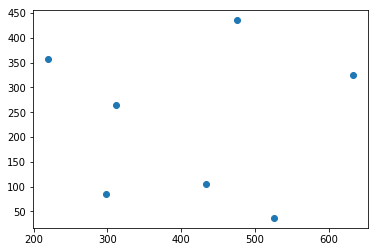

In [19]:
xx = [i[0] for i in r]
yy = [480 - i[1] for i in r]
plt.scatter(xx, yy)

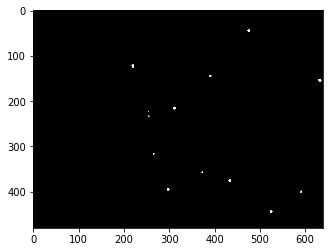

In [20]:
img2 = mixed_img.copy()
img2[img2 < 180] = 0
plt.imshow(img2,cmap='gray')
plt.show()

In [21]:
s = '%d'%(4)
type(s)

str

In [24]:
bytes('123','ascii')

b'123'

In [26]:
ord('\r')

13

In [27]:
chr(51)

'3'